# Problem: Locating a Defined Area in the Star Map

First, the libraries to be used were imported. 

In [23]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

Afterwards, a function was written to find a part on the map on the map that has not been processed. At this stage, numpy arrays is used.

In [25]:
def searchImage(input_starMap, input_image):
  starMap = np.array(input_starMap)
  input = np.array(input_image)
  
  starMapX = starMap.shape[0]
  starMapY = starMap.shape[1]
  
  smallAreaX = input.shape[0]
  smallAreaY = input.shape[1]


  stopx = starMapX - smallAreaX + 1
  stopy = starMapY - smallAreaY + 1

  plt.imshow(input)
  
  for x in range(0, stopx):
    for y in range(0, stopy):
      x2 = x + smallAreaX
      y2 = y + smallAreaY
      tempImage = starMap[y:y2, x:x2]
      if np.array_equal(tempImage, input):
        #print(x,y)
        return x,y, x2, y2
        
  
  return -1, -1, -1, -1

photo reading process performed using by Opencv

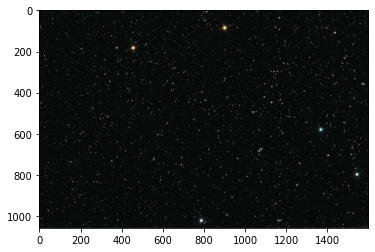

In [24]:
starMapPath  = "StarMap.png"
starMap = cv2.imread(starMapPath)
plt.imshow(starMap)
starMapNp = np.array(starMap)

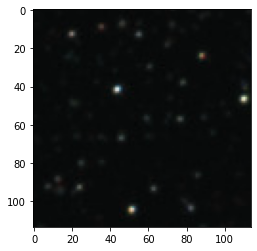

In [6]:
smallAreaPath  = "/content/Small_area.png"
smallArea = cv2.imread(smallAreaPath)
plt.imshow(smallArea)

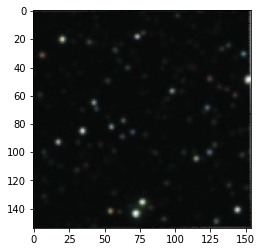

In [17]:
smallAreaRotatedPath  = "/content/Small_area_rotated.png"
smallAreaRotated = cv2.imread(smallAreaRotatedPath)
plt.imshow(smallAreaRotated)

855
150
969
264


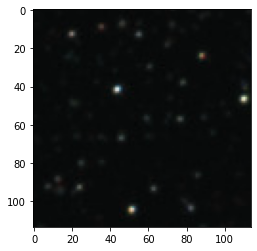

In [41]:
x1,y1, x2,y2 = searchImage(starMap, smallArea)
print(x1)
print(y1)
print(x2)
print(y2)

Founded coordinates are marked on the star map

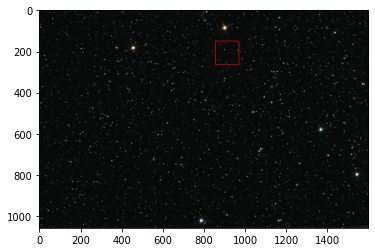

In [42]:
starMapCopy = np.copy(starMap)
starMapCopy = cv2.rectangle(starMapCopy, (x1, y1), (x2, y2), (255, 0, 0), 2)  
plt.imshow(starMapCopy)

Finally, in order to find the rotated photo on the map, I add all the pixel values of the small photo and searched by taking the same size sections on the map.

In [35]:
def searchImageSumPixels(input_starMap, input_image):
  starMap = np.array(input_starMap)
  smallArea = np.array(input_image)

  starMapX = starMap.shape[0]
  starMapY = starMap.shape[1]
  
  smallAreaX = smallArea.shape[0]
  smallAreaY = smallArea.shape[1]
  print(smallAreaX)
  print(smallAreaY)

  stopx = starMapX - smallAreaX + 1
  stopy = starMapY - smallAreaY + 1

  sum_pixels = np.sum(smallArea)
  print(sum_pixels)
  
  for x in range(0, stopx):
    for y in range(0, stopy):
      x2 = x + smallAreaX
      y2 = y + smallAreaY
      tempImage = starMap[y:y2, x:x2]
      if np.sum(tempImage) == sum_pixels:
        #print(x,y)
        return x,y, x2, y2
        
  
  return -1, -1, -1, -1

In [39]:
x1,y1, x2,y2 = searchImageSumPixels(starMap, smallAreaRotated)
print(str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2) )

154
154
957914
-1, -1, -1, -1
